# Подготовка к работе:

**Загрузка библиотек**

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn

**Загрузка тренировочного набора:**

In [2]:
df = pd.read_csv('../datasets/train.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


# Работа с данными

## Пропущенные значения:

*В результате разведовательного анализа мы выяснили, что у нас есть пропущенные значения в тренировочном датасете*

**Выведем признаки с пропущенными значениями:**

In [3]:
df.isnull().sum()[df.isnull().sum() > 0]

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

**Запишем признаки с пропущенными значениями в отдельный список:**

In [4]:
missing_cols = df.isnull().sum()[df.isnull().sum() > 0].index

**Удалим признаки, где более 50% значений пропущены.**
<br>*Исходя из предположения о том, что влияние этих признаков на исход достатчно мало*

In [5]:
threshold = 0.5 * len(df)  # 50% от числа строк в DataFrame

cols_to_drop = df.columns[df.isnull().sum() > threshold]
print(f"Столбцы для удаления: {list(cols_to_drop)}")

df.drop(columns=cols_to_drop, inplace=True, axis=1)

Столбцы для удаления: ['Alley', 'MasVnrType', 'PoolQC', 'Fence', 'MiscFeature']


**Обновим список признаков с пропущенными значениями**

In [6]:
missing_cols = list(set(missing_cols) - set(cols_to_drop))

**Разделим признаки на группы:**
<br>*Пользуясь описанием датасета(data_description.txt)*

In [7]:
num_cols = ['LotFrontage', 'MasVnrArea']
num_cat_cols = ['GarageYrBlt']

bsmt_cat_cols = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
garage_cat_cols = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
mode_cat_cols = ['Electrical', 'FireplaceQu']

**Заполним оставшиеся пропущенные значения:**

1) Числовые данные;
2) Категориальные данные.

Для определния способа заполнения пустых значений, проанализируем распределение и выбросы числовых признаков с пропущенными значениями

**Построим квантиль-квантильные графики для анализа распределения:**

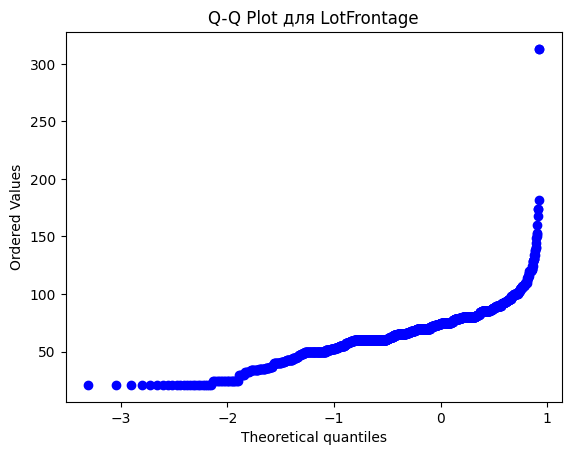

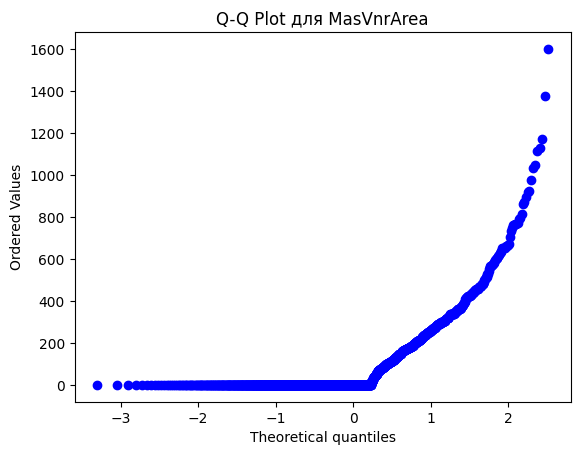

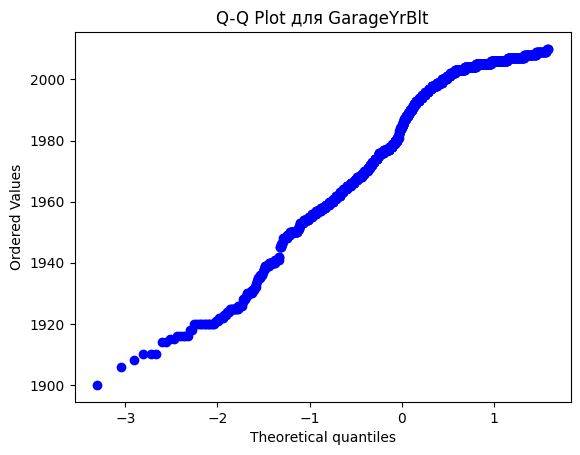

In [8]:
import scipy as sp
# Q-Q plot
for column in num_cols:
    sp.stats.probplot(df[column], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot для {column}')
    plt.show()

sp.stats.probplot(df['GarageYrBlt'], dist="norm", plot=plt)
plt.title('Q-Q Plot для GarageYrBlt')
plt.show()

*Результат определяется приближённостью распределения точек в форме диагонали(чем ближе, тем "нормальнее" распределение)*

* GarageYrBlt - имеет распределение близкое к нормальному
* LotFrontage, MasVnrArea - нет

**Теперь анализ выбросов:**


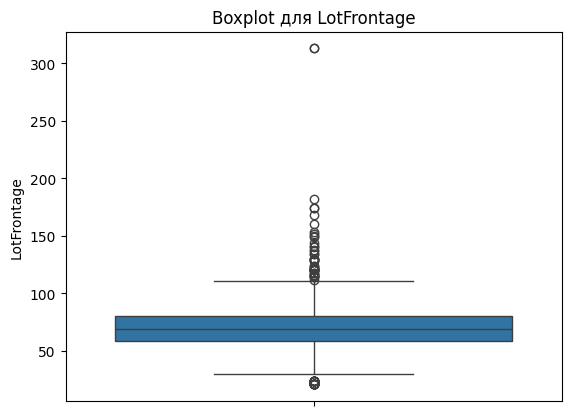

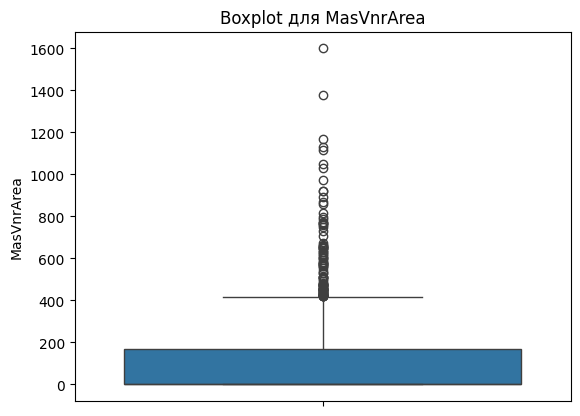

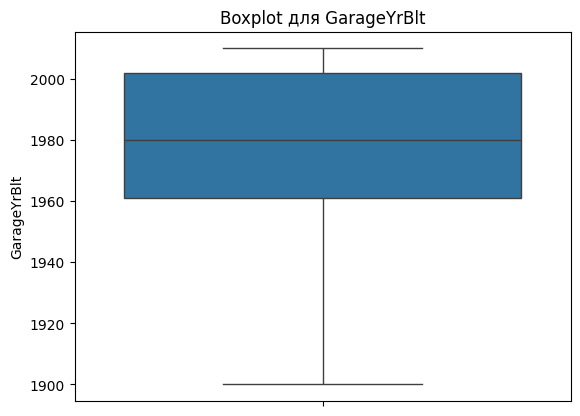

In [9]:
for column in num_cols:
    sns.boxplot(df[column])
    plt.title(f'Boxplot для {column}')
    plt.show()

sns.boxplot(df['GarageYrBlt'])
plt.title(f'Boxplot для GarageYrBlt')
plt.show()

**Вообще исходя из описания набора и уникальных значений 'GarageYrBlt', можно сразу понять, что выбросов здесь нет, но может график лишним не будет.**

In [10]:
df['GarageYrBlt'].unique()

array([2003., 1976., 2001., 1998., 2000., 1993., 2004., 1973., 1931.,
       1939., 1965., 2005., 1962., 2006., 1960., 1991., 1970., 1967.,
       1958., 1930., 2002., 1968., 2007., 2008., 1957., 1920., 1966.,
       1959., 1995., 1954., 1953.,   nan, 1983., 1977., 1997., 1985.,
       1963., 1981., 1964., 1999., 1935., 1990., 1945., 1987., 1989.,
       1915., 1956., 1948., 1974., 2009., 1950., 1961., 1921., 1900.,
       1979., 1951., 1969., 1936., 1975., 1971., 1923., 1984., 1926.,
       1955., 1986., 1988., 1916., 1932., 1972., 1918., 1980., 1924.,
       1996., 1940., 1949., 1994., 1910., 1978., 1982., 1992., 1925.,
       1941., 2010., 1927., 1947., 1937., 1942., 1938., 1952., 1928.,
       1922., 1934., 1906., 1914., 1946., 1908., 1929., 1933.])

**Анализ выбросов также можно выразить численно, с помощью "межквартильного размаха(IQR)"**
<br>*Тут уже не будем использовать GarageYrBlt*

In [11]:
# Списки для признаков с выбросами и без
num_cols_outliers = []
num_cols_no_outliers = []

for column in num_cols:
    data = df[column].dropna()

    # Вычисление квартилей и IQR
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1

    # Границы для определения выбросов
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Фильтрация выбросов
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    
    # Доля выбросов
    outliers_pct = len(outliers) / len(data) * 100  

    # Детальный вывод по каждому признаку
    print(f'{"-"*75}')
    print(f'\nСтолбец: {column}')
    print(f'Выбросы: \n{outliers}')
    print(f'Доля выбросов: {outliers_pct:.2f}%')
    print(f'{"-"*75}')

    # Если доля выбросов > 5%, добавляем столбец в список
    if outliers_pct > 5:
        num_cols_outliers.append(column)
    else:
        num_cols_no_outliers.append(column)

# Вывод получившихся списков
print(f'\nСтолбцы с выбросами (доля выбросов > 5%):\n{num_cols_outliers}')
print(f'\nНормально распределённые столбцы (доля выбросов < 5%):\n{num_cols_no_outliers}')

---------------------------------------------------------------------------

Столбец: LotFrontage
Выбросы: 
36      112.0
41      115.0
56       24.0
75       21.0
85      121.0
        ...  
1339    120.0
1359    129.0
1361    124.0
1378     21.0
1449     21.0
Name: LotFrontage, Length: 88, dtype: float64
Доля выбросов: 7.33%
---------------------------------------------------------------------------
---------------------------------------------------------------------------

Столбец: MasVnrArea
Выбросы: 
25       640.0
37       650.0
56       456.0
58      1031.0
64       573.0
         ...  
1417     731.0
1420     420.0
1426     448.0
1437     426.0
1447     438.0
Name: MasVnrArea, Length: 96, dtype: float64
Доля выбросов: 6.61%
---------------------------------------------------------------------------

Столбцы с выбросами (доля выбросов > 5%):
['LotFrontage', 'MasVnrArea']

Нормально распределённые столбцы (доля выбросов < 5%):
[]


**Заполнение пропущенных значений:**

В зависимости от категории, в которую мы определили признаки, заполним их:
* Числовые - медиана(сод. выбросы), среднее значение(не содержит), мода, пользовательское значение;
* Категориальные - мода, 'None', пользовательское.

In [12]:
for column in df.columns:
    if column in num_cols_outliers:
        df[column] = df[column].fillna(df[column].median())  # Заполняем медианой для столбцов с выбросами
    elif column in num_cat_cols:
        df[column] = df[column].fillna(df[column].mode()[0]) # также можно заполнить случайными значениями из этого же столбца
        #np.random.choice(df[column].dropna().unique())
    elif column in mode_cat_cols:
        df[column] = df[column].fillna(df[column].mode()[0])
    elif column in bsmt_cat_cols:
        df[column] = df[column].fillna('NoBsmt') # пользовательское значение основанное на описании датасета
    elif column in garage_cat_cols:
        df[column] = df[column].fillna('NoGrg')

**Ещё раз проверим на наличие пропущенных значений, чтобы убедиться, что мы ничего не пропустили:**

In [13]:
df.isnull().sum()[df.isnull().sum() > 0]

Series([], dtype: int64)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

## Категориальные данные:

**Определение списков признаков:**
<br>*Для последующего явного преобразования признаков в датафрейме*
* Числовые;
* Категориальные;
* Двоичные(булевы).

In [15]:
num_cols = df.select_dtypes(exclude=['object']).columns.tolist()
num_cols.remove('Id')
bool_cols = ['CentralAir']
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
cat_cols = [col for col in cat_cols if col not in bool_cols] # remove

print(f'Числовые признаки: \n{num_cols}\nКоличество признаков: {len(num_cols)}')
print(f'\nКатегориальные признаки: \n{cat_cols}\nКоличество признаков: {len(cat_cols)}')
print(f'\nДвоичные признаки: \n{bool_cols}\nКоличество признаков: {len(bool_cols)}')
print(f'\nУдалённые признаки: \n{cols_to_drop}\nКоличество признаков: {len(cols_to_drop)}')

Числовые признаки: 
['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
Количество признаков: 37

Категориальные признаки: 
['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'Garag

**Применение типов данных к фрейму:**
<br>*Числовые изначально определены*

In [16]:
df[cat_cols] = df[cat_cols].astype('category')
df['CentralAir'] = [1 if ca=='Y' else 0 for ca in df['CentralAir']]

Для работы моделей, решения задач DS и ML, необходимо преобразовать категориальные данные(символьные) в числовые категориальные данные.

Для этого нужно закодировать имеющиеся категории в числа методами:
* **Label Encoding** - для категорий, которые имеют градацию, ранжирование(Best->Worst, C2->A1);
* **One-Hot Encoding** - для категорий, которые не имеют чёткой связи между собой(различные перечисления, типы, классификации и т.п.).

*Существуют и другие методы, но здесь я решил применить эти.*
<br>*Опорное кодирование не было выбрано в следствии предположения о сложности интерпретации признаков(хотя могло бы значительно сократить набор)*

**Пользуясь описанием набора данных, разделим признаки для разных категорий**

In [17]:
rank_cats = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'FireplaceQu',
             'GarageQual', 'GarageCond']

default_cats = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
                'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'Foundation', 'Heating', 'Electrical', 'Functional',
                'GarageType', 'GarageFinish', 'PavedDrive', 'SaleType', 'SaleCondition']

**Разделим данные обучения на тренировочную и контрольную группы:**
<br>*Можно было сделать это после преобразования, но забегая наперёд, конечный набор данных, для которого мы будем предсказывать значения, не содержит "исхода" в признаках, что вызовет проблемы при приведении категориальных данных конечного набора в соответствие к обучающему.*

In [18]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['SalePrice'])
y = df['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=81)

In [19]:
from sklearn.preprocessing import LabelEncoder
# Создаем словарь для хранения LabelEncoder для применения этих же настроек в последующих наборах данных
label_encoders = {}

# Обучаем и трансформируем ранжирующиеся категориальные признаки
for col in rank_cats:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])  # Трансформируем тестовые данные с тем же LabelEncoder
    label_encoders[col] = le  # Сохраняем LabelEncoder
    
# Преобразуем остальные категориальные признаки
X_train = pd.get_dummies(X_train, columns=default_cats, dtype=int)
X_test = pd.get_dummies(X_test, columns=default_cats, dtype=int)

# Работа с моделями:

## Моделирование регресии(до нормализации/стандартизации):

**Модель Линейная Регрессия:**

In [20]:
from sklearn.linear_model import LinearRegression

# Инициализация модели
lr_model = LinearRegression()
# Обучение модели
lr_model.fit(X_train, y_train)
# Прогнозирование
y_pred_lr = lr_model.predict(X_test)

**Модель Ridge(лр с регуляризацией):**

In [21]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

**Модель Lasso:**

In [22]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

C:\Users\QSquirrel\PycharmProjects\regression\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.614e+10, tolerance: 6.406e+08
  model = cd_fast.enet_coordinate_descent(


**Модель ElasticNet:**

In [23]:
from sklearn.linear_model import ElasticNet

elasticnet_model = ElasticNet(alpha=1.0, l1_ratio=0.5, max_iter=10000)
elasticnet_model.fit(X_train, y_train)
y_pred_en = elasticnet_model.predict(X_test)

C:\Users\QSquirrel\PycharmProjects\regression\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.773e+11, tolerance: 6.406e+08
  model = cd_fast.enet_coordinate_descent(


**Модель Деревья Решений:**

In [24]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

**Модель Случайный Лес:**

In [25]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=81)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

**Модель XGBoost:**

In [26]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train.to_numpy(), y_train.to_numpy())
y_pred_xgb = xgb_model.predict(X_test.to_numpy())

**Модель Наивный Байес:**

In [27]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

**Модель Логистическая Регрессия:**

In [28]:
from sklearn.linear_model import LogisticRegression

# Инициализация модели
logreg_model = LogisticRegression()
# Обучение модели
logreg_model.fit(X_train, y_train)
# Прогнозирование
y_pred_logreg = logreg_model.predict(X_test)

C:\Users\QSquirrel\PycharmProjects\regression\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Модель k ближайших соседей(knn):**

In [29]:
from sklearn.neighbors import KNeighborsRegressor

# Инициализация модели
knn_model = KNeighborsRegressor(n_neighbors=5)
# Обучение модели
knn_model.fit(X_train, y_train)
# Прогнозирование
y_pred_knn = knn_model.predict(X_test)

**Далее оценим показатели ошибок для каждой модели:**

* RMSE - оценка среднеквадратической ошибки модели(корень - для приближения величины ошибки к величине исхода)
* R2 - доля объяснённой дисперсии. Для оценки общей точности модели.
* Mean Err - средняя разница между предсказаниями и фактическими значениями.
* MAPE - Средний процент ошибки.

In [30]:
from sklearn.metrics import mean_squared_error, r2_score

# Расчет метрик для Linear
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)
mean_error_lr = np.mean(y_test - y_pred_lr)
mape_lr = np.mean(np.abs((y_test - y_pred_lr) / y_test)) * 100

# Расчет метрик для Ridge
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
mean_error_ridge = np.mean(y_test - y_pred_ridge)
mape_ridge = np.mean(np.abs((y_test - y_pred_ridge) / y_test)) * 100

# Расчет метрик для Lasso
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
mean_error_lasso = np.mean(y_test - y_pred_lasso)
mape_lasso = np.mean(np.abs((y_test - y_pred_lasso) / y_test)) * 100

# Расчет метрик для Elastic Net
mse_en = mean_squared_error(y_test, y_pred_en)
rmse_en = np.sqrt(mse_en)
r2_en = r2_score(y_test, y_pred_en)
mean_error_en = np.mean(y_test - y_pred_en)
mape_en = np.mean(np.abs((y_test - y_pred_en) / y_test)) * 100

# Расчет метрик для Naive Bayes
mse_nb = mean_squared_error(y_test, y_pred_nb)
rmse_nb = np.sqrt(mse_nb)
r2_nb = r2_score(y_test, y_pred_nb)
mean_error_nb = np.mean(y_test - y_pred_nb)
mape_nb = np.mean(np.abs((y_test - y_pred_nb) / y_test)) * 100

# Расчет метрик для LogisticReg
mse_logreg = mean_squared_error(y_test, y_pred_logreg)
rmse_logreg = np.sqrt(mse_logreg)
r2_logreg = r2_score(y_test, y_pred_logreg)
mean_error_logreg = np.mean(y_test - y_pred_logreg)
mape_logreg = np.mean(np.abs((y_test - y_pred_logreg) / y_test)) * 100

# Расчет метрик для Decision Tree
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
r2_dt = r2_score(y_test, y_pred_dt)
mean_error_dt = np.mean(y_test - y_pred_dt)
mape_dt = np.mean(np.abs((y_test - y_pred_dt) / y_test)) * 100

# Расчет метрик для Random Forest
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)
mean_error_rf = np.mean(y_test - y_pred_rf)
mape_rf = np.mean(np.abs((y_test - y_pred_rf) / y_test)) * 100

# Расчет метрик для XGBoost
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
mean_error_xgb = np.mean(y_test - y_pred_xgb)
mape_xgb = np.mean(np.abs((y_test - y_pred_xgb) / y_test)) * 100

# Расчет метрик для KNeighbors
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)
r2_knn = r2_score(y_test, y_pred_knn)
mean_error_knn = np.mean(y_test - y_pred_knn)
mape_knn = np.mean(np.abs((y_test - y_pred_knn) / y_test)) * 100



# Фрейм для удобного отображения
metrics_df = pd.DataFrame({
    "Model/Metric": ["MSE", "RMSE", "R²", "Mean Error", "MAPE (%)"],
    "Linear Reg": [mse_lr, rmse_lr, r2_lr, mean_error_lr, mape_lr],
    "Ridge Reg": [mse_ridge, rmse_ridge, r2_ridge, mean_error_ridge, mape_ridge],
    "Lasso Reg": [mse_lasso, rmse_lasso, r2_lasso, mean_error_lasso, mape_lasso],
    "Elastic Net": [mse_en, rmse_en, r2_en, mean_error_en, mape_en],
    "Naive Bayes": [mse_nb, rmse_nb, r2_nb, mean_error_nb, mape_nb],
    "Logistic Reg": [mse_logreg, rmse_logreg, r2_logreg, mean_error_logreg, mape_logreg],
    "Decision Tree": [mse_dt, rmse_dt, r2_dt, mean_error_dt, mape_dt],
    "Random Forest": [mse_rf, rmse_rf, r2_rf, mean_error_rf, mape_rf],
    "XGBoost Reg": [mse_xgb, rmse_xgb, r2_xgb, mean_error_xgb, mape_xgb],
    "KNeighbors Reg": [mse_knn, rmse_knn, r2_knn, mean_error_knn, mape_knn],
})
metrics_df.set_index('Model/Metric', inplace=True)
pd.set_option('display.float_format', lambda x: '%0.4f' % x) # отображение единиц величин
metrics_df.transpose()

Model/Metric,MSE,RMSE,R²,Mean Error,MAPE (%)
Linear Reg,1905931869.4025,43656.9796,0.7020,-1419.7899,11.9171
Ridge Reg,1782339020.9706,42217.7572,0.7214,-1164.5940,11.4957
Lasso Reg,1858818632.7467,43114.0190,0.7094,-1391.4195,11.8849
Elastic Net,1962974426.3345,44305.4672,0.6931,-470.3039,11.7357
Naive Bayes,3130657143.8128,55952.2756,0.5106,12959.9224,17.3414
Logistic Reg,3729298979.6575,61067.9865,0.4170,16296.2466,21.6684
Decision Tree,1434035608.2055,37868.6626,0.7758,-240.5160,14.0623
Random Forest,941977160.8190,30691.6464,0.8527,359.1230,10.6412
XGBoost Reg,809354588.4941,28449.1580,0.8735,38.0318,10.1755
KNeighbors Reg,2391462431.5610,48902.5810,0.6261,7108.4689,17.3131


**Выводы:**
* Для Lasso, ElasticNet и Logistic Reg следует настроить гиперпараметры;
* Logistic Reg, Naive Bayes, KNN, ElasticNet дали худшие результаты.

## Стандартизация:

In [31]:
scale_cols = [col for col in num_cols if col != 'SalePrice'] # величину исхода мы не стандартизируем

In [32]:
scale_cols

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[scale_cols] = scaler.fit_transform(X_train[scale_cols])
X_test[scale_cols] = scaler.transform(X_test[scale_cols])

**Переобучаем модели на стандартизированных данных:**

**Модель Линейная Регрессия:**

In [34]:
# Переобучение модели
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

**Модель Ridge:**

In [35]:
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

**Модель Lasso:**

In [36]:
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

C:\Users\QSquirrel\PycharmProjects\regression\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.615e+10, tolerance: 6.406e+08
  model = cd_fast.enet_coordinate_descent(


**Модель Elastic Net:**

In [37]:
elasticnet_model.fit(X_train, y_train)
y_pred_en = elasticnet_model.predict(X_test)

**Модель Деревья Решеиний:**

In [38]:
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

**Модель Случайный Лес:**

In [39]:
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

**Модель XGBoost:**

In [40]:
xgb_model.fit(X_train.to_numpy(), y_train.to_numpy())
y_pred_xgb = xgb_model.predict(X_test.to_numpy())

**Модель Наивный Байес:**

In [41]:
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

**Модель Логистическая Регрессия:**

In [42]:
logreg_model.fit(X_train, y_train)
y_pred_logreg = logreg_model.predict(X_test)

C:\Users\QSquirrel\PycharmProjects\regression\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Модель k ближайших соседей(knn):**

In [43]:
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

**Пересчитаем оценки работы моделей**

In [44]:
from sklearn.metrics import mean_squared_error, r2_score

# Расчет метрик для Linear
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)
mean_error_lr = np.mean(y_test - y_pred_lr)
mape_lr = np.mean(np.abs((y_test - y_pred_lr) / y_test)) * 100

# Расчет метрик для Ridge
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
mean_error_ridge = np.mean(y_test - y_pred_ridge)
mape_ridge = np.mean(np.abs((y_test - y_pred_ridge) / y_test)) * 100

# Расчет метрик для Lasso
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
mean_error_lasso = np.mean(y_test - y_pred_lasso)
mape_lasso = np.mean(np.abs((y_test - y_pred_lasso) / y_test)) * 100

# Расчет метрик для Elastic Net
mse_en = mean_squared_error(y_test, y_pred_en)
rmse_en = np.sqrt(mse_en)
r2_en = r2_score(y_test, y_pred_en)
mean_error_en = np.mean(y_test - y_pred_en)
mape_en = np.mean(np.abs((y_test - y_pred_en) / y_test)) * 100

# Расчет метрик для Naive Bayes
mse_nb = mean_squared_error(y_test, y_pred_nb)
rmse_nb = np.sqrt(mse_nb)
r2_nb = r2_score(y_test, y_pred_nb)
mean_error_nb = np.mean(y_test - y_pred_nb)
mape_nb = np.mean(np.abs((y_test - y_pred_nb) / y_test)) * 100

# Расчет метрик для LogisticReg
mse_logreg = mean_squared_error(y_test, y_pred_logreg)
rmse_logreg = np.sqrt(mse_logreg)
r2_logreg = r2_score(y_test, y_pred_logreg)
mean_error_logreg = np.mean(y_test - y_pred_logreg)
mape_logreg = np.mean(np.abs((y_test - y_pred_logreg) / y_test)) * 100

# Расчет метрик для Decision Tree
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
r2_dt = r2_score(y_test, y_pred_dt)
mean_error_dt = np.mean(y_test - y_pred_dt)
mape_dt = np.mean(np.abs((y_test - y_pred_dt) / y_test)) * 100

# Расчет метрик для Random Forest
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)
mean_error_rf = np.mean(y_test - y_pred_rf)
mape_rf = np.mean(np.abs((y_test - y_pred_rf) / y_test)) * 100

# Расчет метрик для XGBoost
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
mean_error_xgb = np.mean(y_test - y_pred_xgb)
mape_xgb = np.mean(np.abs((y_test - y_pred_xgb) / y_test)) * 100

# Расчет метрик для KNeighbors
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)
r2_knn = r2_score(y_test, y_pred_knn)
mean_error_knn = np.mean(y_test - y_pred_knn)
mape_knn = np.mean(np.abs((y_test - y_pred_knn) / y_test)) * 100



# Создание DataFrame для удобного отображения
metrics_df = pd.DataFrame({
    "Model/Metric": ["MSE", "RMSE", "R²", "Mean Error", "MAPE (%)"],
    "Linear Reg": [mse_lr, rmse_lr, r2_lr, mean_error_lr, mape_lr],
    "Ridge Reg": [mse_ridge, rmse_ridge, r2_ridge, mean_error_ridge, mape_ridge],
    "Lasso Reg": [mse_lasso, rmse_lasso, r2_lasso, mean_error_lasso, mape_lasso],
    "Elastic Net": [mse_en, rmse_en, r2_en, mean_error_en, mape_en],
    "Naive Bayes": [mse_nb, rmse_nb, r2_nb, mean_error_nb, mape_nb],
    "Logistic Reg": [mse_logreg, rmse_logreg, r2_logreg, mean_error_logreg, mape_logreg],
    "Decision Tree": [mse_dt, rmse_dt, r2_dt, mean_error_dt, mape_dt],
    "Random Forest": [mse_rf, rmse_rf, r2_rf, mean_error_rf, mape_rf],
    "XGBoost Reg": [mse_xgb, rmse_xgb, r2_xgb, mean_error_xgb, mape_xgb],
    "KNeighbors Reg": [mse_knn, rmse_knn, r2_knn, mean_error_knn, mape_knn],
})
metrics_df.set_index('Model/Metric', inplace=True)
pd.set_option('display.float_format', lambda x: '%0.4f' % x)
metrics_df.transpose()

Model/Metric,MSE,RMSE,R²,Mean Error,MAPE (%)
Linear Reg,1905931869.4027,43656.9796,0.7020,-1419.7899,11.9171
Ridge Reg,1780234169.5117,42192.8213,0.7217,-1171.9721,11.5009
Lasso Reg,1858768009.5708,43113.4319,0.7094,-1391.4644,11.8849
Elastic Net,1616826963.3806,40209.7869,0.7472,153.8327,11.0008
Naive Bayes,4269032824.1781,65337.8361,0.3326,16757.8676,19.2955
Logistic Reg,5453735140.3881,73849.4085,0.1474,26442.4566,21.2132
Decision Tree,1434489606.7648,37874.6565,0.7757,-238.4909,14.0711
Random Forest,942049859.9035,30692.8308,0.8527,332.2314,10.6455
XGBoost Reg,809354588.4941,28449.1580,0.8735,38.0318,10.1755
KNeighbors Reg,4444038645.3914,66663.6231,0.3052,5809.7516,26.5929


## Работа с оценками(поиск лучшей модели с помощью кросс-валидации):

**Найдём модель, которая даст меньшие ошибки.**

*Список моделей избирался эксперементальным путём*

In [45]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import LinearSVR
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, mean_absolute_error, root_mean_squared_error, r2_score
import numpy as np

# Определяем функцию для расчёта MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

X_train_np = X_train.to_numpy()
y_train_np = y_train.to_numpy()

# Определяем метрики
scoring = {
    "MAE": make_scorer(mean_absolute_error, greater_is_better=False),
    "RMSE": make_scorer(lambda y, y_pred: root_mean_squared_error(y, y_pred), greater_is_better=False),
    "R2": make_scorer(r2_score),
    "MAPE": make_scorer(mean_absolute_percentage_error, greater_is_better=False)
}

# Кросс-валидация
kf = KFold(n_splits=5, shuffle=True, random_state=81)
models = {

    "Ridge": Ridge(alpha=1.0, max_iter=2000),
    "Decision Tree": DecisionTreeRegressor(random_state=81),
    "Random Forest": RandomForestRegressor(random_state=81),
    "XGBoost": xgb.XGBRegressor(),
    "KNeighbors": KNeighborsRegressor(n_neighbors=5),
    "Gradient Boosting": GradientBoostingRegressor(random_state=81)
}

results = {}
for name, model in models.items():
    # Если модель — XGBoost, передаём массивы NumPy
    if isinstance(model, xgb.XGBRegressor):
        scores = {
            metric: cross_val_score(model, X_train_np, y_train_np, cv=kf, scoring=scorer).mean()
            for metric, scorer in scoring.items()
        }
    else:
        scores = {
            metric: cross_val_score(model, X_train, y_train, cv=kf, scoring=scorer).mean()
            for metric, scorer in scoring.items()
        }
    results[name] = scores

# Вывод результатов
print("Результаты кросс-валидации:")
for model, scores in results.items():
    print(f"\nМодель: {model}")
    for metric, score in scores.items():
        # Для MAPE и других отрицательных метрик меняем знак на положительный для удобства интерпретации
        score_to_display = -score if metric in {"MAE", "RMSE", "MAPE"} else score
        print(f"  {metric}: {score_to_display:.4f}")


Результаты кросс-валидации:

Модель: Ridge
  MAE: 19042.5320
  RMSE: 30326.9144
  R2: 0.8477
  MAPE: 11.6312

Модель: Decision Tree
  MAE: 28837.2021
  RMSE: 44730.1839
  R2: 0.6764
  MAPE: 16.8653

Модель: Random Forest
  MAE: 17861.6195
  RMSE: 29901.6308
  R2: 0.8531
  MAPE: 10.5776

Модель: XGBoost
  MAE: 18364.2180
  RMSE: 32076.9439
  R2: 0.8298
  MAPE: 10.5932

Модель: KNeighbors
  MAE: 49064.2746
  RMSE: 70405.8286
  R2: 0.2023
  MAPE: 29.5892

Модель: Gradient Boosting
  MAE: 16406.9981
  RMSE: 28841.4726
  R2: 0.8527
  MAPE: 9.5712


**Вывод:**
* Случайный лес и Градиентный бустинг дают лучшие оценки, значит продолжаем работу с ними.

## Важность признаков:

Для сокращения размерности набора данных(у нас только "на старте" было 80 признаков) можем проанализировать важность признаков для модели.

**Выполним сначала на основе модели Случайного леса:**

In [46]:
# Получение важности признаков
feature_importances = rf_model.feature_importances_

# Создание фрейма для отображения важности признаков
importance_df = pd.DataFrame({
    'Feature': X_train.columns,  # Имя признаков
    'Importance': feature_importances # процент важности
}).sort_values(by='Importance', ascending=False)

importance_df

,Feature,Importance
4,OverallQual,0.5731
25,GrLivArea,0.1134
19,TotalBsmtSF,0.0544
38,GarageArea,0.0254
15,BsmtFinSF1,0.0228
...,...,...
148,Exterior1st_CBlock,0.0000
139,RoofMatl_Metal,0.0000
136,RoofMatl_ClyTile,0.0000
190,Electrical_Mix,0.0000


**Выставив порог важности для признаков, отберём только самые важные для модели признаки:**

In [47]:
# Оставлям только те строки, где Importance >= 0.005
importance_df = importance_df[importance_df['Importance'] >= 0.005]

# Выводим отфильтрованные признаки
print(importance_df)
print(f'Количество: {len(importance_df)}')

         Feature  Importance
4    OverallQual      0.5731
25     GrLivArea      0.1134
19   TotalBsmtSF      0.0544
38    GarageArea      0.0254
15    BsmtFinSF1      0.0228
37    GarageCars      0.0221
22      1stFlrSF      0.0196
23      2ndFlrSF      0.0139
3        LotArea      0.0134
41    WoodDeckSF      0.0093
6      YearBuilt      0.0087
2    LotFrontage      0.0071
18     BsmtUnfSF      0.0069
7   YearRemodAdd      0.0069
34    Fireplaces      0.0068
33  TotRmsAbvGrd      0.0063
11      BsmtQual      0.0055
42   OpenPorchSF      0.0055
Количество: 18


**Отобразим отобранные признаки на графике:**

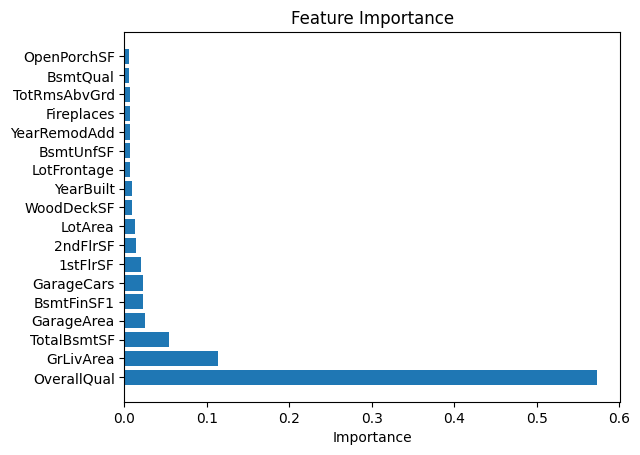

In [48]:
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()

**Отфильтруем тренеровочные наборы данных для последующего переобучения модели с скоращённым количеством признаков:**

In [49]:
# Выберем только 15 признаков
selected_features = importance_df.head(15)['Feature'].tolist()

# Отфильтровать train_X и test_X по выбранным признакам
X_train_selected = X_train.drop(columns=[col for col in X_test.columns if col not in selected_features])
X_test_selected = X_test.drop(columns=[col for col in X_test.columns if col not in selected_features])

**Переобучим модель на сокращённых данных:**

In [50]:
rf_model.fit(X_train_selected, y_train)
y_pred_rf = rf_model.predict(X_test_selected)

**Рассчитаем метрики ошибок модели:**

In [51]:
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)
mean_error_rf = np.mean(y_test - y_pred_rf)
mape_rf = np.mean(np.abs((y_test - y_pred_rf) / y_test)) * 100

metrics_df = pd.DataFrame({
    "Model/Metric": ["MSE", "RMSE", "R²", "Mean Error", "MAPE (%)"],
    "Random Forest": [mse_rf, rmse_rf, r2_rf, mean_error_rf, mape_rf],
})
metrics_df.set_index('Model/Metric', inplace=True)
pd.set_option('display.float_format', lambda x: '%0.4f' % x)
metrics_df.transpose()

Model/Metric,MSE,RMSE,R²,Mean Error,MAPE (%)
Random Forest,934385691.6607,30567.7230,0.8539,-87.2647,11.1129


**Вывод:**
* Оценки почти не изменились, значит можно скоращать количество необходимых для предсказывания признаков.

<details>
<summary>Код к кросс-валидации</summary>

```python
# Функция для расчёта MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Метрики
scoring = {
    "MAE": make_scorer(mean_absolute_error, greater_is_better=False),
    "RMSE": make_scorer(lambda y, y_pred: root_mean_squared_error(y, y_pred), greater_is_better=False),
    "R2": make_scorer(r2_score),
    "MAPE": make_scorer(mean_absolute_percentage_error, greater_is_better=False)
}

# Кросс-валидация
kf = KFold(n_splits=5, shuffle=True, random_state=81)
models = {

    "Random Forest": RandomForestRegressor(random_state=81),
}

results = {}
for name, model in models.items():
    scores = {
        metric: cross_val_score(model, X_train_selected, y_train, cv=kf, scoring=scorer).mean()
        for metric, scorer in scoring.items()
        }
    results[name] = scores

# Результаты
print("Результаты кросс-валидации:")
for model, scores in results.items():
    print(f"\nМодель: {model}")
    for metric, score in scores.items():
        score_to_display = -score if metric in {"MAE", "RMSE", "MAPE"} else score
        print(f"  {metric}: {score_to_display:.4f}")
```

</details>

## Гиперпараметры:

**Для получения лучшего результата предсказания, с помощью кросс-валидации переберём гиперпараметры выбранной модели и применим их:**

In [52]:
from sklearn.model_selection import GridSearchCV

# Определение гиперпараметров
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Настройка GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Запуск поиска
grid_search.fit(X_train, y_train)

# Получаем лучшие параметры
best_params = grid_search.best_params_
print("Best Hyperparameters: ", best_params)

# Оценка модели с лучшими параметрами
best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_test)

# Оценка производительности
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mean_error = np.mean(y_test - y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(
    f"\nMSE: {mse}",
    f"\nRMSE: {rmse}",
    f"\nR2: {r2}",
    f"\nMean Error: {mean_error}",
    f"\nMAPE: {mape}"
)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


C:\Users\QSquirrel\PycharmProjects\regression\.venv\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Hyperparameters:  {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}

MSE: 991029601.9193687 
RMSE: 31480.62264186286 
R2: 0.8450653072453848 
Mean Error: 692.6513149032022 
MAPE: 10.63206304189088


## Интерпретация результатов:

**Построим график, который покажет различие между предсказанными значениями и истинными:**

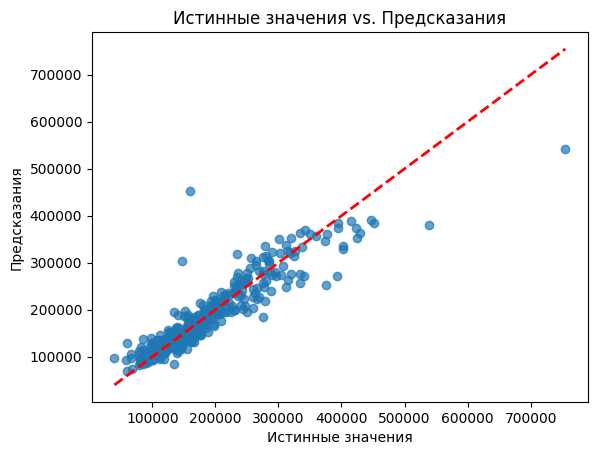

In [53]:
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.title("Истинные значения vs. Предсказания")
plt.xlabel("Истинные значения")
plt.ylabel("Предсказания")
plt.show()

# Предсказание для тестового набора данных:

**Главная задача - привести данные в новом наборе к таким же распределениям как и в обученном**

**Загрузка данных:**

In [54]:
test_df = pd.read_csv('../datasets/test.csv')
test_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0000,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0000,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0000,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0000,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0000,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0000,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0000,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0000,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0000,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


**Определяем признаки с пропущенными значениями:**

In [55]:
missing_cols = test_df.isnull().sum()[test_df.isnull().sum() > 0].index
print(f'{missing_cols}\n{len(missing_cols)}')

Index(['MSZoning', 'LotFrontage', 'Alley', 'Utilities', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath',
       'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType'],
      dtype='object')
33


**Признаки с пропущенными значениями в данном наборе отличаются(они будут отличаться и для других), но следуя нашей задаче, мы удаляем только те, которые были удалены из обучающего набора:**

In [56]:
print(f"Столбцы для удаления: {list(cols_to_drop)}")

test_df.drop(columns=cols_to_drop, inplace=True, axis=1)

Столбцы для удаления: ['Alley', 'MasVnrType', 'PoolQC', 'Fence', 'MiscFeature']


**Обновим список признаков с пропущенными значениями:**

In [57]:
missing_cols = list(set(missing_cols) - set(cols_to_drop))

**Разделим признаки на группы:**
<br>*Снова пользуясь описанием датасета(data_description.txt)*

In [58]:
num_cols = ['MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', 'BsmtUnfSF', 'LotFrontage', 'GarageArea']
num_cat_cols = ['BsmtFullBath', 'BsmtHalfBath', 'GarageCars', 'GarageYrBlt']

bsmt_cat_cols = ['BsmtExposure', 'BsmtQual', 'BsmtFinType1', 'BsmtFinType2', 'BsmtCond']
garage_cat_cols = ['GarageType', 'GarageCond', 'GarageQual', 'GarageFinish']
mode_cat_cols = ['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'KitchenQual', 'SaleType', 'Functional', 'FireplaceQu']

**Точно таким же способом как и до этого отберём числовые признаки с выбросами:**

In [59]:
# Список для столбцов с выбросами
num_cols_outliers = []
num_cols_no_outliers = []

for column in num_cols:
    data = test_df[column].dropna()  # Удаляем пропущенные значения

    # Вычисление квартилей и IQR
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1

    # Границы для определения выбросов
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Фильтрация выбросов
    outliers = data[(data < lower_bound) | (data > upper_bound)]

    # Доля выбросов
    outliers_pct = len(outliers) / len(data) * 100

#    print(f"\nСтолбец: {column}")
#    print(f"Выбросы: \n{outliers}")
#    print(f"Доля выбросов: {outliers_pct:.2f}%")

    # Если доля выбросов > 5%, добавляем столбец в список
    if outliers_pct > 5:
        num_cols_outliers.append(column)
    else:
        num_cols_no_outliers.append(column)

# Выводим список с выбросами и без
print(f'\nСтолбцы с выбросами (доля выбросов > 5%):\n{num_cols_outliers}')
print(f'\Нормально распределённые столбцы (доля выбросов < 5%):\n{num_cols_no_outliers}')


Столбцы с выбросами (доля выбросов > 5%):
['MasVnrArea', 'BsmtFinSF2', 'LotFrontage']
\Нормально распределённые столбцы (доля выбросов < 5%):
['BsmtFinSF1', 'TotalBsmtSF', 'BsmtUnfSF', 'GarageArea']


**Заполнение пропущенных значений:**

In [60]:
for column in test_df.columns:
    if column in num_cols_outliers:
        test_df[column] = test_df[column].fillna(test_df[column].median())
    elif column in num_cols_no_outliers:
        test_df[column] = test_df[column].fillna(test_df[column].mean())
    elif column in num_cat_cols:
        test_df[column] = test_df[column].fillna(test_df[column].mode()[0])
    elif column in mode_cat_cols:
        test_df[column] = test_df[column].fillna(test_df[column].mode()[0])
    elif column in bsmt_cat_cols:
        test_df[column] = test_df[column].fillna('NoBsmt')
    elif column in garage_cat_cols:
        test_df[column] = test_df[column].fillna('NoGrg')

**Убеждаемся, что всё заполнили:**

In [61]:
test_df.isnull().sum()[test_df.isnull().sum() > 0]

Series([], dtype: int64)

**Создаём списки признаков для разных типов данных:**

In [62]:
num_cols = test_df.select_dtypes(exclude=['object']).columns.tolist()
num_cols.remove('Id')
bool_cols = ['CentralAir']
cat_cols = test_df.select_dtypes(include=['object']).columns.tolist()
cat_cols = [col for col in cat_cols if col not in bool_cols] # remove


#num_cols = list(set(num_cols))
print(f'Числовые признаки: \n{num_cols}\nКоличество признаков: {len(num_cols)}')
print(f'\nКатегориальные признаки: \n{cat_cols}\nКоличество признаков: {len(cat_cols)}')
print(f'\nДвоичные признаки: \n{bool_cols}\nКоличество признаков: {len(bool_cols)}')
print(f'\nУдалённые признаки: \n{cols_to_drop}\nКоличество признаков: {len(cols_to_drop)}')

Числовые признаки: 
['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
Количество признаков: 36

Категориальные признаки: 
['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'Gara

**Явно определяем типы данных:**

In [63]:
df[cat_cols] = df[cat_cols].astype('category')
df['CentralAir'] = [1 if ca=='Y' else 0 for ca in df['CentralAir']]

**Преобразуем категории в числовой вид:**

In [64]:
# Преобразуем ранжированные категории в наборе
for col in rank_cats:
    test_df[col] = label_encoders[col].transform(test_df[col])  # Используем сохраненные LabelEncoder

# Преобразуем остальные столбцы в наборе
test_df = pd.get_dummies(test_df, columns=default_cats, dtype=int)

**Оставляем только "важные" признаки:**

In [65]:
test_df = test_df.drop(columns=[col for col in test_df.columns if col not in selected_features])

**Предсказываем исход на новых данных, используя готовую модель:**

In [66]:
predictions = rf_model.predict(test_df)

**Сохраняем результаты предсказаний в файл:**

In [67]:
output = pd.DataFrame({'Id': test_df.index, 'Predictions': predictions})
output.to_csv("predictions.csv", index=False)

print("Предсказания сохранены в файл predictions.csv")

Предсказания сохранены в файл predictions.csv
